In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Importar df downtime limpiio
TablaMaestraDowntime = pd.read_csv("/content/TablaMaestraDowntime.csv")

In [ ]:
# Visualizamos el dataframe TablaMaestraDowntime
TablaMaestraDowntime

,Unnamed: 0,EventID,ScheduleID,AssetName,DownStart,DownEnd,Reason,Category,DownStart_dia,DownStart_mes,DownStart_año,Total_Duration,Fault_Number,Category_Number,OEE,Total_Time,Production_Goal,Planned_Rate,DayOfWeek
0,0,1052248,25579,Bench 100D,2022-01-06,2022-01-06,Falla 49: Lifter MarkerPosn. Superior,Position Sensor Faults,6,1,2022,12,49,3,1.0,600,157,15.7,3
1,1,1052250,25579,Bench 100D,2022-01-06,2022-01-06,Falla 58: C-Clip Posn. Extendida,Position Sensor Faults,6,1,2022,2,58,3,1.0,600,157,15.7,3
2,2,1052253,25579,Bench 100D,2022-01-06,2022-01-06,Falla189. Paremtro Close lenght Tolerancia Act...,Position Sensor Faults,6,1,2022,1,189,3,1.0,600,157,15.7,3
3,3,1052265,25579,Bench 100D,2022-01-06,2022-01-06,Falla 49: Lifter MarkerPosn. Superior,Position Sensor Faults,6,1,2022,1,49,3,1.0,600,157,15.7,3
4,4,1052274,25579,Bench 100D,2022-01-06,2022-01-06,Falla 102: Disponible,Other Faults,6,1,2022,8,102,9,1.0,600,157,15.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50950,50950,1717115,59167,Bench 100D,2024-05-07,2024-05-07,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,7,5,2024,1,35,0,1.0,336,0,20.0,1
50951,50951,1717120,59167,Bench 100D,2024-05-07,2024-05-07,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,7,5,2024,1,35,0,1.0,336,0,20.0,1
50952,50952,1717121,59167,Bench 100D,2024-05-07,2024-05-07,Falla 12. Scanner de Seguridad Interrumpido Du...,Scanner Faults,7,5,2024,2,12,6,1.0,336,0,20.0,1
50953,50953,1717122,59167,Bench 100D,2024-05-07,2024-05-07,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,7,5,2024,1,35,0,1.0,336,0,20.0,1


In [ ]:
# Definir las características y los transformadores
categorical_features = ['Category']
numeric_features = ['Total_Duration','Total_Time', 'Production_Goal', 'Planned_Rate',"DownStart_dia","DownStart_mes","DayOfWeek"]

In [ ]:
# Transformador para escalar las características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
# Transformador para codificar características categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combinar los transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Aplicar los transformadores
processed_data = preprocessor.fit_transform(TablaMaestraDowntime)

# Análisis Exploratorio de Datos (EDA) - Avance 2

Este repositorio contiene el código y la documentación asociada con el Análisis Exploratorio de Datos (EDA) realizado en un conjunto de datos específico. El objetivo de este README es proporcionar una visión general del EDA realizado y los hallazgos clave.

### A) Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:

-Generación de nuevas características

-Discretización o binning
-Codificación (ordinal, one hot,…)
-Escalamiento (normalización, estandarización, min – max,…)
-Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)

## Normalización y estandarización:
Al aplicar *StandardScaler*, normalizamos las características numéricas para que tengan una media de cero y una desviación estándar de uno. Esto es importante porque muchos modelos de regresión (como la regresión lineal) asumen que las características están en la misma escala. La estandarización asegura que todas las características contribuyan de manera equitativa al modelo.
Codificación de variables categóricas:

*OneHotEncoder* se utiliza para convertir variables categóricas en una representación numérica adecuada para los modelos de regresión. Esto es necesario porque la mayoría de los modelos de regresión no pueden manejar variables categóricas directamente. La codificación one-hot crea una columna binaria para cada categoría única, lo que permite al modelo capturar las relaciones no lineales entre las categorías y la variable objetivo.

### B) Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar:

-Umbral de varianza
-Correlación
-Chi-cuadrado
-ANOVA
-Análisis de componentes principales (PCA)
-Análisis factorial (FA)

## Reducción de la dimensionalidad:
El PCA se utiliza para reducir la dimensionalidad del conjunto de datos al proyectarlo en un espacio de características de menor dimensión mientras se conserva la mayor cantidad posible de la variabilidad original de los datos. Esto puede ser beneficioso cuando se trabaja con conjuntos de datos de alta dimensionalidad para reducir el riesgo de sobreajuste y mejorar la generalización del modelo. Además, al reducir la dimensionalidad, también podemos reducir el tiempo de entrenamiento del modelo y los requisitos de memoria.
La justificación de la aplicación de estos pasos específicos radica en su capacidad para mejorar la calidad de los datos y la capacidad predictiva del modelo de regresión resultante. Al normalizar y codificar adecuadamente las características y reducir la dimensionalidad del conjunto de datos, podemos preparar un conjunto de datos más limpio y estructurado que pueda ser más fácilmente interpretado por el modelo de regresión, lo que potencialmente resultará en mejores predicciones.


## Contribuciones y Contacto
Si tienes alguna pregunta o sugerencia sobre el análisis realizado o el código asociado, no dudes en contactar al equipo a través de [Julio Quintana](A01793661@tec.mx) | [Pablo Colunga] (A01793671@tec.mx) | [Marco Antonio Lopez](A01113135@tec.mx) .

¡Gracias por tu interés en nuestro análisis exploratorio de datos!

In [ ]:
#Convertir el resultado a un DataFrame de pandas
processed_df = pd.DataFrame(processed_data)

In [ ]:
# Obtener nombres de características one-hot
onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Obtener todos los nombres de las características
feature_names = numeric_features + list(onehot_feature_names)

# Convertir la matriz procesada a un DataFrame con los nombres de las características
processed_df = pd.DataFrame(processed_data, columns=feature_names)

# Análisis Exploratorio de Datos (EDA) - Avance 2

Este repositorio contiene el código y la documentación asociada con el Análisis Exploratorio de Datos (EDA) realizado en un conjunto de datos específico. El objetivo de este README es proporcionar una visión general del EDA realizado y los hallazgos clave.

### A) Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:

-Generación de nuevas características

-Discretización o binning

-Codificación (ordinal, one hot,…)

-Escalamiento (normalización, estandarización, min – max,…)

-Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)

## Normalización y estandarización:
Al aplicar *StandardScaler*, normalizamos las características numéricas para que tengan una media de cero y una desviación estándar de uno. Esto es importante porque muchos modelos de regresión (como la regresión lineal) asumen que las características están en la misma escala. La estandarización asegura que todas las características contribuyan de manera equitativa al modelo.
Codificación de variables categóricas:

*OneHotEncoder* se utiliza para convertir variables categóricas en una representación numérica adecuada para los modelos de regresión. Esto es necesario porque la mayoría de los modelos de regresión no pueden manejar variables categóricas directamente. La codificación one-hot crea una columna binaria para cada categoría única, lo que permite al modelo capturar las relaciones no lineales entre las categorías y la variable objetivo.

![One hot encoding](https://github.com/JulioQuintanaGarcia/ProyectoIntegradorE30/blob/main/images/onehot_encoding.png)


### B) Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar:

-Umbral de varianza

-Correlación

-Chi-cuadrado

-ANOVA

-Análisis de componentes principales (PCA)

-Análisis factorial (FA)

Se estuvieron realizando distintintos metodos para la selección de características, como puede ser la correlación entre vriables, en donde no se observan relaciones tan fuertes, estando en el rango de -0.3 a 0.3.

![Correlación](https://github.com/JulioQuintanaGarcia/ProyectoIntegradorE30/blob/main/images/correlacion.png)



## Reducción de la dimensionalidad:
El PCA se utiliza para reducir la dimensionalidad del conjunto de datos al proyectarlo en un espacio de características de menor dimensión mientras se conserva la mayor cantidad posible de la variabilidad original de los datos. Esto puede ser beneficioso cuando se trabaja con conjuntos de datos de alta dimensionalidad para reducir el riesgo de sobreajuste y mejorar la generalización del modelo. Además, al reducir la dimensionalidad, también podemos reducir el tiempo de entrenamiento del modelo y los requisitos de memoria.

La justificación de la aplicación de estos pasos específicos radica en su capacidad para mejorar la calidad de los datos y la capacidad predictiva del modelo de regresión resultante. Al normalizar y codificar adecuadamente las características y reducir la dimensionalidad del conjunto de datos, podemos preparar un conjunto de datos más limpio y estructurado que pueda ser más fácilmente interpretado por el modelo de regresión, lo que potencialmente resultará en mejores predicciones.


![PCA](https://github.com/JulioQuintanaGarcia/ProyectoIntegradorE30/blob/main/images/PCA.png)


## Contribuciones y Contacto
Si tienes alguna pregunta o sugerencia sobre el análisis realizado o el código asociado, no dudes en contactar al equipo a través de [Julio Quintana](A01793661@tec.mx) | [Pablo Colunga](A01793671@tec.mx) | [Marco Antonio Lopez](A01113135@tec.mx) .

¡Gracias por tu interés en nuestro análisis exploratorio de datos!

In [ ]:
processed_df

,Total_Duration,Total_Time,Production_Goal,Planned_Rate,DownStart_dia,DownStart_mes,DayOfWeek,Category_Electrical Faults,Category_External Device Faults,Category_Invalid Parameters,Category_Other Faults,Category_Pin Position Faults,Category_Position Sensor Faults,Category_Relay Faults,Category_Scanner Faults,Category_Servo Pin Faults,Category_Servo Support Faults
0,-0.031376,0.193587,0.188678,-0.201287,-1.042485,-1.284218,0.710629,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.033058,0.193587,0.188678,-0.201287,-1.042485,-1.284218,0.710629,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.033226,0.193587,0.188678,-0.201287,-1.042485,-1.284218,0.710629,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.033226,0.193587,0.188678,-0.201287,-1.042485,-1.284218,0.710629,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.032049,0.193587,0.188678,-0.201287,-1.042485,-1.284218,0.710629,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50950,-0.033226,-2.221624,-1.194259,0.192297,-0.928380,-0.113552,-0.711047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50951,-0.033226,-2.221624,-1.194259,0.192297,-0.928380,-0.113552,-0.711047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50952,-0.033058,-2.221624,-1.194259,0.192297,-0.928380,-0.113552,-0.711047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50953,-0.033226,-2.221624,-1.194259,0.192297,-0.928380,-0.113552,-0.711047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Aplicar PCA
pca = PCA(n_components=10)  # Especifica el número de componentes principales deseados
pca_result = pca.fit_transform(processed_df)

In [ ]:
# Obtener la varianza explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Imprimir los componentes principales y la varianza explicada
for i, variance in enumerate(variance_explained):
    print(f"Componente principal {i+1}: {variance:.2f}")

Componente principal 1: 0.23
Componente principal 2: 0.18
Componente principal 3: 0.14
Componente principal 4: 0.13
Componente principal 5: 0.12
Componente principal 6: 0.09
Componente principal 7: 0.04
Componente principal 8: 0.03
Componente principal 9: 0.02
Componente principal 10: 0.01


In [ ]:
# Obtener la varianza explicada acumulada
cumulative_variance_explained = np.cumsum(variance_explained)

# Imprimir la varianza explicada acumulada
for i, variance in enumerate(cumulative_variance_explained):
    print(f"Varianza acumulada hasta el componente principal {i+1}: {variance:.2f}")

Varianza acumulada hasta el componente principal 1: 0.23
Varianza acumulada hasta el componente principal 2: 0.41
Varianza acumulada hasta el componente principal 3: 0.54
Varianza acumulada hasta el componente principal 4: 0.67
Varianza acumulada hasta el componente principal 5: 0.79
Varianza acumulada hasta el componente principal 6: 0.88
Varianza acumulada hasta el componente principal 7: 0.92
Varianza acumulada hasta el componente principal 8: 0.96
Varianza acumulada hasta el componente principal 9: 0.97
Varianza acumulada hasta el componente principal 10: 0.99


In [ ]:
# Crear un DataFrame para almacenar los resultados
pca_weights_df = pd.DataFrame(pca.components_, columns=processed_df.columns)

# Imprimir los resultados
print("PCA y sus pesos por variable:")
pca_weights_df

PCA y sus pesos por variable:


,Total_Duration,Total_Time,Production_Goal,Planned_Rate,DownStart_dia,DownStart_mes,DayOfWeek,Category_Electrical Faults,Category_External Device Faults,Category_Invalid Parameters,Category_Other Faults,Category_Pin Position Faults,Category_Position Sensor Faults,Category_Relay Faults,Category_Scanner Faults,Category_Servo Pin Faults,Category_Servo Support Faults
0,-0.014455,0.117151,0.710139,0.640663,-0.059780,0.226771,-0.126638,-0.000133,0.000514,-0.001569,0.000452,-0.007932,-0.007115,-0.000795,0.012156,-9.427018e-07,0.004422
1,0.094124,-0.686831,-0.021365,0.268163,-0.143720,-0.007100,0.651224,-0.000208,-0.001544,-0.005298,-0.002638,-0.012912,-0.028464,0.002472,0.020331,-8.508430e-05,0.028345
2,0.125094,-0.036083,0.065092,0.241650,0.669299,-0.680308,-0.006233,0.000780,-0.002831,0.001914,0.008585,0.037126,0.056083,-0.001622,-0.048631,-2.035646e-04,-0.051200
3,0.965408,0.076061,0.021394,-0.087216,0.077028,0.219269,-0.003813,0.000578,0.002359,0.001582,-0.001299,-0.003673,-0.007279,0.003960,0.004292,-2.674429e-06,-0.000517
4,0.195169,0.201402,-0.011330,0.129870,-0.714526,-0.623311,-0.029672,-0.000845,-0.002517,0.001362,0.002538,0.018381,0.043797,-0.001441,-0.041833,1.610578e-04,-0.019602
5,0.071478,-0.610330,-0.161372,0.139865,-0.088936,-0.017474,-0.745014,0.001080,-0.000145,-0.009797,-0.004852,-0.035919,-0.071608,0.003906,0.064560,-1.634964e-04,0.052938
6,0.001497,0.024612,-0.015115,0.019609,0.020120,-0.003224,0.000627,-0.000688,-0.003206,-0.005869,-0.006209,-0.057653,-0.098709,-0.011936,-0.603473,-2.228881e-04,0.787966
7,0.006430,0.278817,-0.467993,0.447297,0.053704,0.055000,0.058116,-0.002384,-0.009099,-0.016165,-0.017714,-0.205782,-0.432295,-0.013174,0.451018,-8.923516e-05,0.245686
8,0.000891,0.064921,-0.257689,0.238502,0.010617,0.106023,-0.009756,-0.000910,-0.002233,-0.015103,-0.016762,-0.565940,0.727356,0.009895,-0.098153,1.571406e-04,-0.038306
9,-0.001451,0.108632,-0.420981,0.395773,0.000494,0.184378,-0.019682,0.001122,0.010159,-0.000474,-0.002241,0.577538,0.058469,0.084918,-0.431036,1.327115e-03,-0.299782


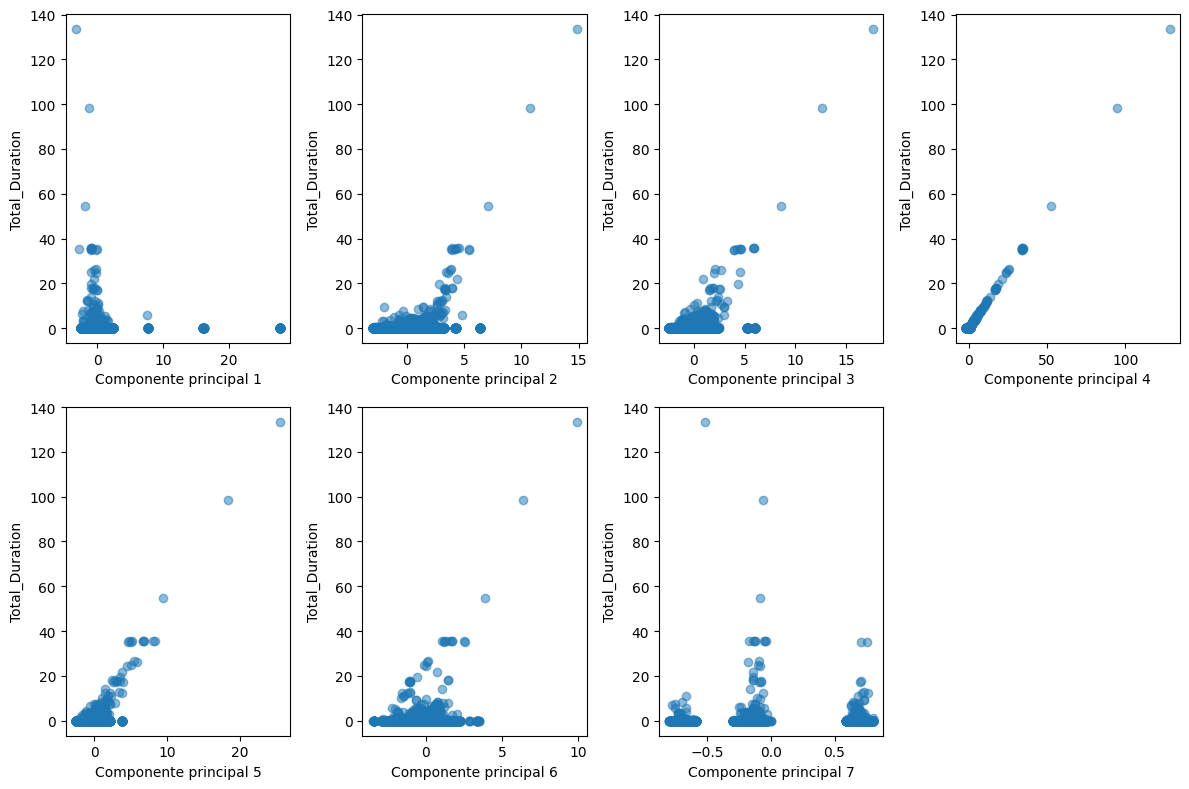

In [ ]:
n_selected_components = 7  # Define el número de componentes principales que deseas seleccionar
selected_components = pca_result[:, :n_selected_components]
# Crear un gráfico de dispersión para cada componente principal vs Total_Duration
num_components = selected_components.shape[1]

plt.figure(figsize=(12, 8))
for i in range(num_components):
    plt.subplot(2, (num_components + 1) // 2, i+1)  # Se ajusta el número de columnas
    plt.scatter(selected_components[:, i], processed_df['Total_Duration'], alpha=0.5)
    plt.xlabel(f'Componente principal {i+1}')
    plt.ylabel('Total_Duration')

plt.tight_layout()
plt.show()

Desempeño en el conjunto de entrenamiento:
Error cuadrático medio (MSE): 1.168068100342219
Error absoluto medio (MAE): 0.07853560596426198
Coeficiente de determinación (R²): 0.0023967538545286438

Desempeño en el conjunto de prueba:
Error cuadrático medio (MSE): 0.31441508116925454
Error absoluto medio (MAE): 0.07533088367913314
Coeficiente de determinación (R²): 0.006556285411163598


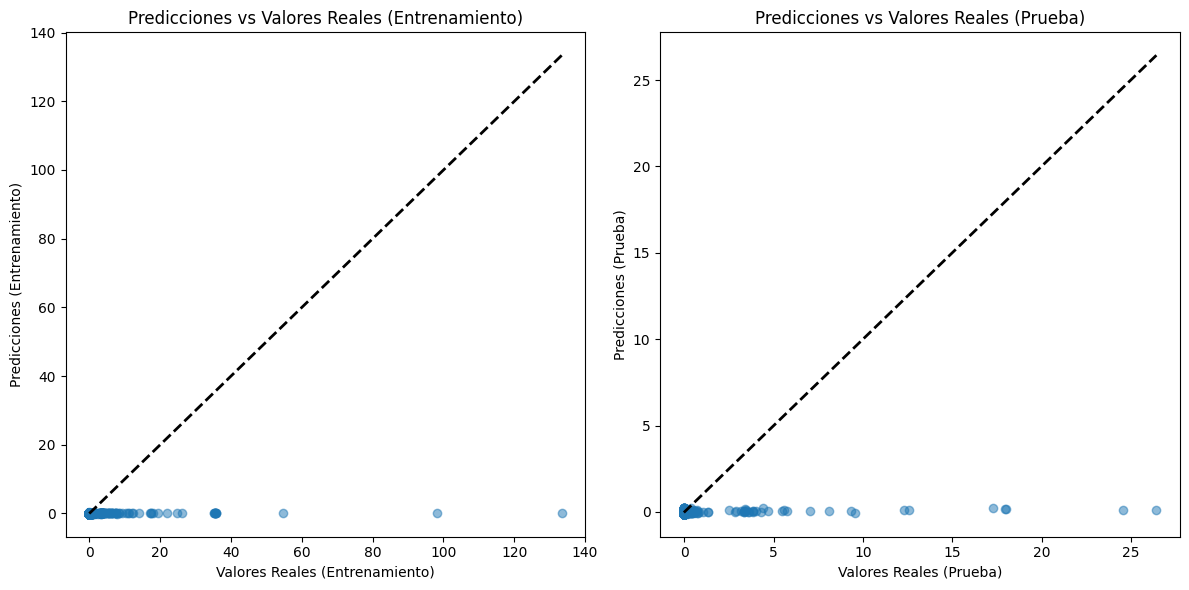

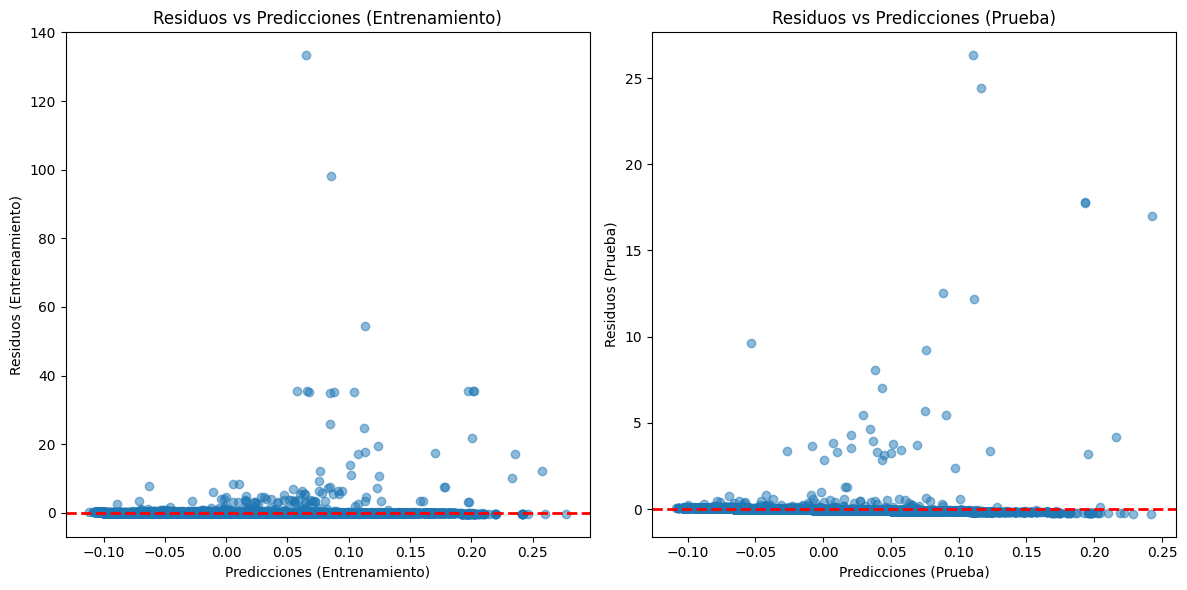

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba

X = processed_df.drop(columns=['Total_Duration'],axis=1)
Y = processed_df['Total_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

# Evaluar el modelo en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Desempeño en el conjunto de entrenamiento:")
print("Error cuadrático medio (MSE):", mse_train)
print("Error absoluto medio (MAE):", mae_train)
print("Coeficiente de determinación (R²):", r2_train)

# Evaluar el modelo en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nDesempeño en el conjunto de prueba:")
print("Error cuadrático medio (MSE):", mse_test)
print("Error absoluto medio (MAE):", mae_test)
print("Coeficiente de determinación (R²):", r2_test)

# Crear gráficos de Predicciones vs Valores Reales para entrenamiento y prueba
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valores Reales (Entrenamiento)')
plt.ylabel('Predicciones (Entrenamiento)')
plt.title('Predicciones vs Valores Reales (Entrenamiento)')

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales (Prueba)')
plt.ylabel('Predicciones (Prueba)')
plt.title('Predicciones vs Valores Reales (Prueba)')

plt.tight_layout()
plt.show()

# Crear gráficos de Residuos vs Predicciones para entrenamiento y prueba
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
residuos_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuos_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicciones (Entrenamiento)')
plt.ylabel('Residuos (Entrenamiento)')
plt.title('Residuos vs Predicciones (Entrenamiento)')

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
residuos_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuos_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicciones (Prueba)')
plt.ylabel('Residuos (Prueba)')
plt.title('Residuos vs Predicciones (Prueba)')

plt.tight_layout()
plt.show()

Desempeño del modelo: Decision Tree
Conjunto de Entrenamiento:
MSE: 0.7836271172778192
MAE: 0.037347034880009775
R²: 0.3307334086643282
Conjunto de Prueba:
MSE: 0.2640324655474392
MAE: 0.042580200260530374
R²: 0.1657480539099967


Desempeño del modelo: Random Forest
Conjunto de Entrenamiento:
MSE: 0.8084829572371657
MAE: 0.04161845492914334
R²: 0.30950496605738465
Conjunto de Prueba:
MSE: 0.276881599171817
MAE: 0.04466456066873992
R²: 0.12514920289566311


Desempeño del modelo: Gradient Boosting
Conjunto de Entrenamiento:
MSE: 1.072903284429417
MAE: 0.06080947762460512
R²: 0.08367346130474762
Conjunto de Prueba:
MSE: 0.2597689957113257
MAE: 0.0578942174766315
R²: 0.1792191548994112


Desempeño del modelo: Support Vector Regressor
Conjunto de Entrenamiento:
MSE: 1.1721291855787541
MAE: 0.12329032552319635
R²: -0.0010716670480317436
Conjunto de Prueba:
MSE: 0.3172933921777762
MAE: 0.11909278858703369
R²: -0.0025381892222220426


Desempeño del modelo: K-Nearest Neighbors
Conjunto de Entre

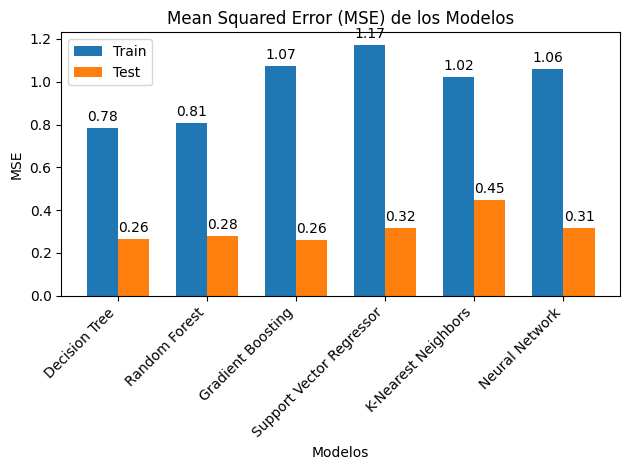

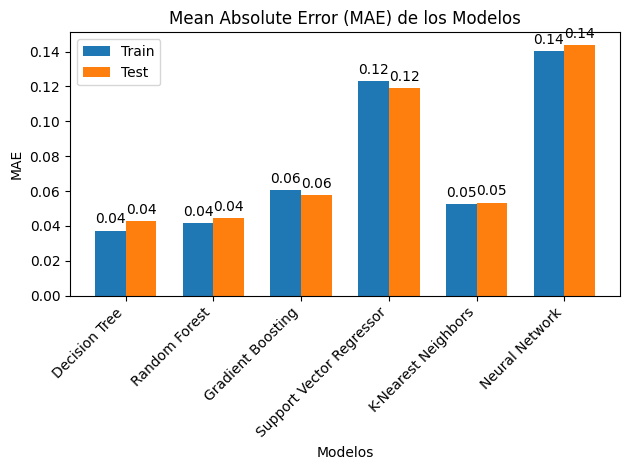

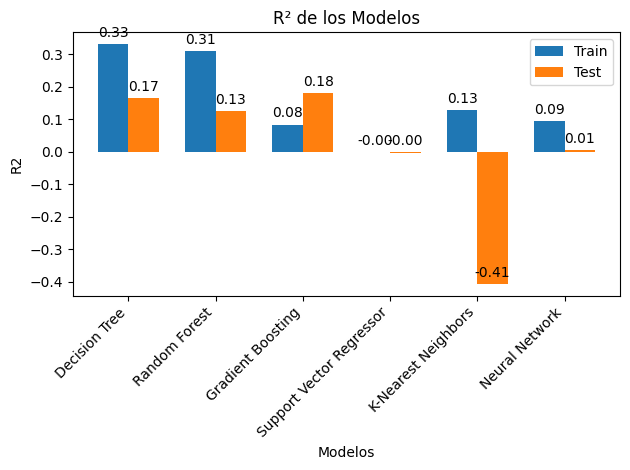

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
# Definir los modelos
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(max_iter=500)
}

# Entrenar y evaluar cada modelo
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results[model_name] = {
        'train': {
            'MSE': mean_squared_error(y_train, y_train_pred),
            'MAE': mean_absolute_error(y_train, y_train_pred),
            'R2': r2_score(y_train, y_train_pred)
        },
        'test': {
            'MSE': mean_squared_error(y_test, y_test_pred),
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'R2': r2_score(y_test, y_test_pred)
        }
    }

# Imprimir los resultados
for model_name, metrics in results.items():
    print(f"Desempeño del modelo: {model_name}")
    print("Conjunto de Entrenamiento:")
    print("MSE:", metrics['train']['MSE'])
    print("MAE:", metrics['train']['MAE'])
    print("R²:", metrics['train']['R2'])
    print("Conjunto de Prueba:")
    print("MSE:", metrics['test']['MSE'])
    print("MAE:", metrics['test']['MAE'])
    print("R²:", metrics['test']['R2'])
    print("\n")

# Visualizar los resultados
def plot_metrics(results, metric, title):
    models = list(results.keys())
    train_scores = [results[model]['train'][metric] for model in models]
    test_scores = [results[model]['test'][metric] for model in models]

    x = np.arange(len(models))  # Posición de las barras
    width = 0.35  # Ancho de las barras

    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, train_scores, width, label='Train')
    bars2 = ax.bar(x + width/2, test_scores, width, label='Test')

    # Añadir etiquetas y título
    ax.set_xlabel('Modelos')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right")
    ax.legend()

    # Añadir etiquetas encima de las barras
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bars1)
    add_labels(bars2)

    plt.tight_layout()
    plt.show()

# Graficar MSE
plot_metrics(results, 'MSE', 'Mean Squared Error (MSE) de los Modelos')

# Graficar MAE
plot_metrics(results, 'MAE', 'Mean Absolute Error (MAE) de los Modelos')

# Graficar R²
plot_metrics(results, 'R2', 'R² de los Modelos')


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo de árbol de decisión
tree_reg = DecisionTreeRegressor()

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo con los mejores hiperparámetros
best_tree_reg = DecisionTreeRegressor(**best_params)

# Entrenar el nuevo modelo
best_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = best_tree_reg.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 0.2885272032743768
MAE: 0.04768273881248003
R²: 0.08835309198630703


Epoch 1/100
1020/1020 [==============================] - 7s 4ms/step - loss: 0.8396 - val_loss: 2.5185
Epoch 2/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.8303 - val_loss: 2.5427
Epoch 3/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.8232 - val_loss: 2.5181
Epoch 4/100
1020/1020 [==============================] - 3s 3ms/step - loss: 0.8159 - val_loss: 2.5167
Epoch 5/100
1020/1020 [==============================] - 3s 3ms/step - loss: 0.8099 - val_loss: 2.5162
Epoch 6/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.7994 - val_loss: 2.5098
Epoch 7/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.7881 - val_loss: 2.5249
Epoch 8/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.7730 - val_loss: 2.5134
Epoch 9/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.7596 - val_loss: 2.5177
Epoch 10/100
1020/1020 [==============================] - 2s 2ms/step - l

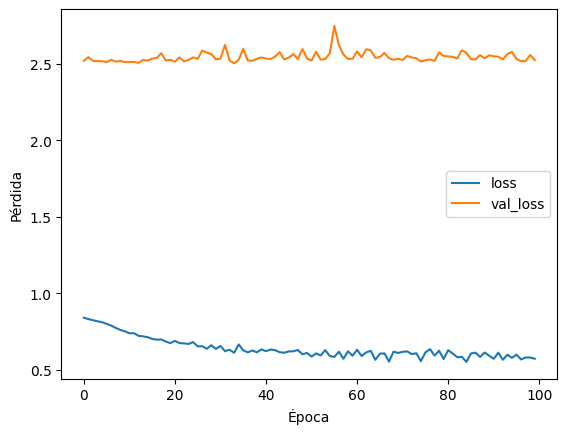

In [ ]:

# Definir el modelo de deep learning
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Desempeño del modelo de Deep Learning")
print("Conjunto de Entrenamiento:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R²:", train_r2)
print("Conjunto de Prueba:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R²:", test_r2)
print("\n")

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Epoch 1/200
1020/1020 [==============================] - 11s 9ms/step - loss: 0.9167 - val_loss: 2.5494
Epoch 2/200
1020/1020 [==============================] - 4s 4ms/step - loss: 0.8530 - val_loss: 2.5252
Epoch 3/200
1020/1020 [==============================] - 3s 3ms/step - loss: 0.8372 - val_loss: 2.5338
Epoch 4/200
1020/1020 [==============================] - 3s 3ms/step - loss: 0.8405 - val_loss: 2.5236
Epoch 5/200
1020/1020 [==============================] - 2s 2ms/step - loss: 0.8371 - val_loss: 2.5186
Epoch 6/200
1020/1020 [==============================] - 3s 3ms/step - loss: 0.8323 - val_loss: 2.5191
Epoch 7/200
1020/1020 [==============================] - 3s 3ms/step - loss: 0.8330 - val_loss: 2.5224
Epoch 8/200
1020/1020 [==============================] - 3s 3ms/step - loss: 0.8323 - val_loss: 2.5185
Epoch 9/200
1020/1020 [==============================] - 3s 3ms/step - loss: 0.8293 - val_loss: 2.5234
Epoch 10/200
1020/1020 [==============================] - 2s 2ms/step - 

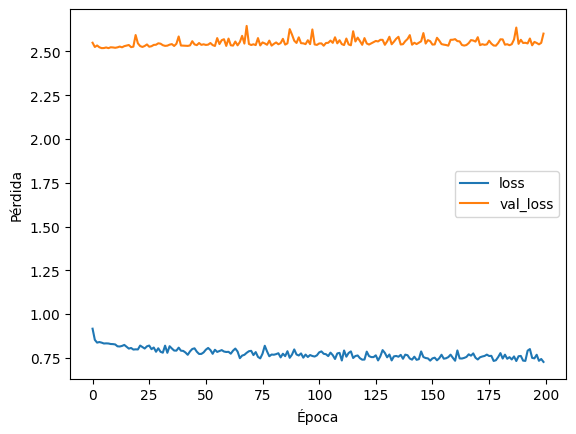

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
# Definir el modelo de deep learning
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Desempeño del modelo de Deep Learning")
print("Conjunto de Entrenamiento:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R²:", train_r2)
print("Conjunto de Prueba:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R²:", test_r2)
print("\n")

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()